In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway



# **Milestone 1: Data Collection, Exploration, and Preprocessing**

In [2]:
df = pd.read_csv('D:/Programming/Projects/9- Employee Attrition Prediction/Milestone_1 (data collection and analysis)/Datasets/train.csv')
df_test = pd.read_csv('D:/Programming/Projects/9- Employee Attrition Prediction/Milestone_1 (data collection and analysis)/Datasets/test.csv')

In [3]:
df.shape

(59598, 24)

In [4]:
df.head()

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,Male,19,Education,5390,Excellent,Medium,Average,2,...,0,Mid,Medium,89,No,No,No,Excellent,Medium,Stayed
1,64756,59,Female,4,Media,5534,Poor,High,Low,3,...,3,Mid,Medium,21,No,No,No,Fair,Low,Stayed
2,30257,24,Female,10,Healthcare,8159,Good,High,Low,0,...,3,Mid,Medium,74,No,No,No,Poor,Low,Stayed
3,65791,36,Female,7,Education,3989,Good,High,High,1,...,2,Mid,Small,50,Yes,No,No,Good,Medium,Stayed
4,65026,56,Male,41,Education,4821,Fair,Very High,Average,0,...,0,Senior,Medium,68,No,No,No,Fair,Medium,Stayed


In [5]:
df.columns

Index(['Employee ID', 'Age', 'Gender', 'Years at Company', 'Job Role',
       'Monthly Income', 'Work-Life Balance', 'Job Satisfaction',
       'Performance Rating', 'Number of Promotions', 'Overtime',
       'Distance from Home', 'Education Level', 'Marital Status',
       'Number of Dependents', 'Job Level', 'Company Size', 'Company Tenure',
       'Remote Work', 'Leadership Opportunities', 'Innovation Opportunities',
       'Company Reputation', 'Employee Recognition', 'Attrition'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59598 entries, 0 to 59597
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Employee ID               59598 non-null  int64 
 1   Age                       59598 non-null  int64 
 2   Gender                    59598 non-null  object
 3   Years at Company          59598 non-null  int64 
 4   Job Role                  59598 non-null  object
 5   Monthly Income            59598 non-null  int64 
 6   Work-Life Balance         59598 non-null  object
 7   Job Satisfaction          59598 non-null  object
 8   Performance Rating        59598 non-null  object
 9   Number of Promotions      59598 non-null  int64 
 10  Overtime                  59598 non-null  object
 11  Distance from Home        59598 non-null  int64 
 12  Education Level           59598 non-null  object
 13  Marital Status            59598 non-null  object
 14  Number of Dependents  

In [7]:
df.describe()

,Employee ID,Age,Years at Company,Monthly Income,Number of Promotions,Distance from Home,Number of Dependents,Company Tenure
count,59598.000000,59598.000000,59598.000000,59598.000000,59598.000000,59598.000000,59598.000000,59598.000000
mean,37227.118729,38.565875,15.753901,7302.397983,0.832578,50.007651,1.648075,55.758415
std,21519.150028,12.079673,11.245981,2151.457423,0.994991,28.466459,1.555689,25.411090
min,1.000000,18.000000,1.000000,1316.000000,0.000000,1.000000,0.000000,2.000000
25%,18580.250000,28.000000,7.000000,5658.000000,0.000000,25.000000,0.000000,36.000000
50%,37209.500000,39.000000,13.000000,7354.000000,1.000000,50.000000,1.000000,56.000000
75%,55876.750000,49.000000,23.000000,8880.000000,2.000000,75.000000,3.000000,76.000000
max,74498.000000,59.000000,51.000000,16149.000000,4.000000,99.000000,6.000000,128.000000


In [8]:
for col in df:
    print(col)
    print(df[col].unique())
    print("\n")

Employee ID
[ 8410 64756 30257 ... 54887   861 15796]


Age
[31 59 24 36 56 38 47 48 57 30 29 40 19 33 49 51 39 54 23 45 42 53 37 34
 25 41 55 21 28 26 52 50 27 58 43 35 46 44 20 18 22 32]


Gender
['Male' 'Female']


Years at Company
[19  4 10  7 41  3 23 16 44  1 12  6 38 22 30  9 37 33 13  5 21 32 34 11
  2 18 27 17 36  8 28 35 14 24 40 15 45 39 20 43 26 29 46 42 25 31 47 48
 49 50 51]


Job Role
['Education' 'Media' 'Healthcare' 'Technology' 'Finance']


Monthly Income
[ 5390  5534  8159 ... 12440  2975 12260]


Work-Life Balance
['Excellent' 'Poor' 'Good' 'Fair']


Job Satisfaction
['Medium' 'High' 'Very High' 'Low']


Performance Rating
['Average' 'Low' 'High' 'Below Average']


Number of Promotions
[2 3 0 1 4]


Overtime
['No' 'Yes']


Distance from Home
[22 21 11 27 71 37 75  5 39 57 51 26 78 30 98 48 17 86 60 10 18 95 23 16
 63 92 58 55 31 32 82  8 74  3 76 47 67 84 14 36 79 52 44 89 64  7 87 24
 15 81 13 35 68 56 73 41 34 29 19 50 62 49 69 33 61 53 72 91 65 93 28 46
 54  9 45

In [9]:
df.isnull().sum()

Employee ID                 0
Age                         0
Gender                      0
Years at Company            0
Job Role                    0
Monthly Income              0
Work-Life Balance           0
Job Satisfaction            0
Performance Rating          0
Number of Promotions        0
Overtime                    0
Distance from Home          0
Education Level             0
Marital Status              0
Number of Dependents        0
Job Level                   0
Company Size                0
Company Tenure              0
Remote Work                 0
Leadership Opportunities    0
Innovation Opportunities    0
Company Reputation          0
Employee Recognition        0
Attrition                   0
dtype: int64

In [10]:
df.duplicated().sum()

0

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59598 entries, 0 to 59597
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Employee ID               59598 non-null  int64 
 1   Age                       59598 non-null  int64 
 2   Gender                    59598 non-null  object
 3   Years at Company          59598 non-null  int64 
 4   Job Role                  59598 non-null  object
 5   Monthly Income            59598 non-null  int64 
 6   Work-Life Balance         59598 non-null  object
 7   Job Satisfaction          59598 non-null  object
 8   Performance Rating        59598 non-null  object
 9   Number of Promotions      59598 non-null  int64 
 10  Overtime                  59598 non-null  object
 11  Distance from Home        59598 non-null  int64 
 12  Education Level           59598 non-null  object
 13  Marital Status            59598 non-null  object
 14  Number of Dependents  

In [12]:
categorical_df = df.select_dtypes(include=['object', 'category'])
for col in categorical_df:
    a = df.groupby(col)[col].count()
    a.sort_values(ascending=False, inplace=True)
    total = a.sum()

    print(col)
    for value, count in a.items():
        percent = (count / total) * 100
        print(f"{value}: {percent:.2f}%")
    print("\n")

Gender
Male: 54.93%
Female: 45.07%


Job Role
Technology: 26.02%
Healthcare: 22.89%
Education: 20.96%
Media: 16.06%
Finance: 14.07%


Work-Life Balance
Good: 37.80%
Fair: 30.28%
Excellent: 17.99%
Poor: 13.94%


Job Satisfaction
High: 49.97%
Very High: 20.32%
Medium: 19.83%
Low: 9.88%


Performance Rating
Average: 60.09%
High: 19.95%
Below Average: 15.02%
Low: 4.95%


Overtime
No: 67.36%
Yes: 32.64%


Education Level
Bachelor’s Degree: 29.91%
Associate Degree: 25.03%
Master’s Degree: 20.17%
High School: 19.71%
PhD: 5.18%


Marital Status
Married: 50.18%
Single: 34.96%
Divorced: 14.86%


Job Level
Entry: 40.05%
Mid: 39.86%
Senior: 20.10%


Company Size
Medium: 49.91%
Small: 30.09%
Large: 20.00%


Remote Work
No: 80.94%
Yes: 19.06%


Leadership Opportunities
No: 95.10%
Yes: 4.90%


Innovation Opportunities
No: 83.72%
Yes: 16.28%


Company Reputation
Good: 49.94%
Poor: 20.19%
Fair: 19.83%
Excellent: 10.04%


Employee Recognition
Low: 39.86%
Medium: 30.26%
High: 24.91%
Very High: 4.97%


At

In [13]:
categorical_columns = []

for col in categorical_df:
    categorical_columns.append(col)

print(categorical_columns)

numerical_df = df.select_dtypes(include=['int64', 'float64'])
numerical_columns = numerical_df.columns.tolist()
print(numerical_columns)

['Gender', 'Job Role', 'Work-Life Balance', 'Job Satisfaction', 'Performance Rating', 'Overtime', 'Education Level', 'Marital Status', 'Job Level', 'Company Size', 'Remote Work', 'Leadership Opportunities', 'Innovation Opportunities', 'Company Reputation', 'Employee Recognition', 'Attrition']
['Employee ID', 'Age', 'Years at Company', 'Monthly Income', 'Number of Promotions', 'Distance from Home', 'Number of Dependents', 'Company Tenure']


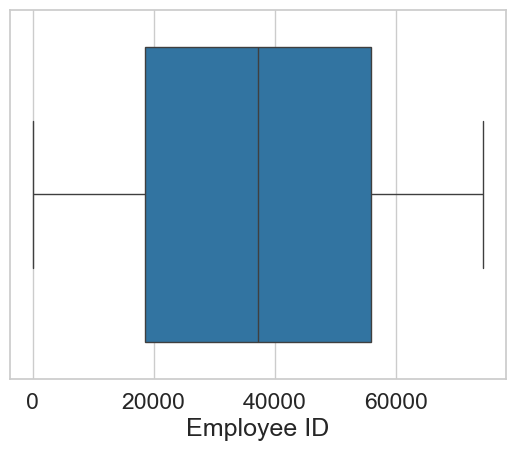

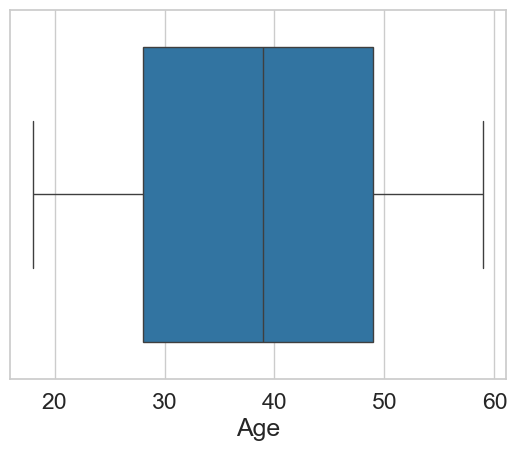

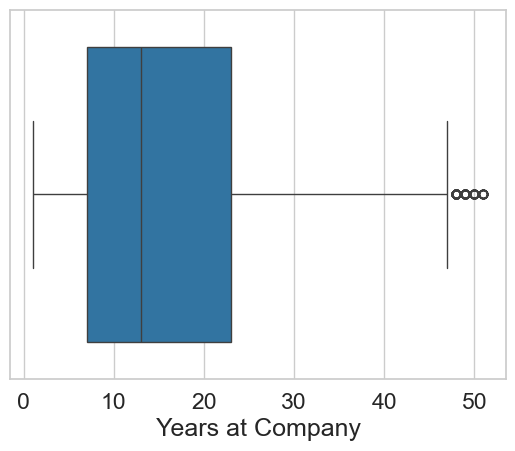

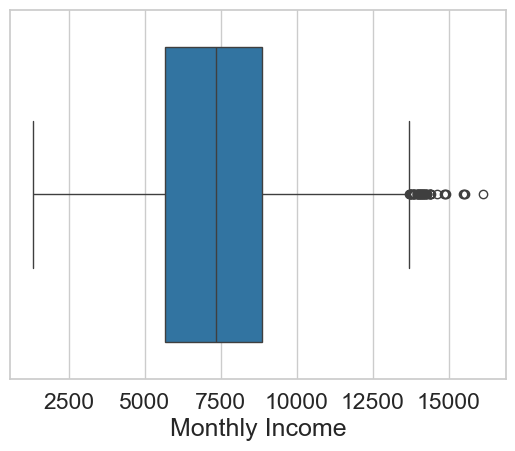

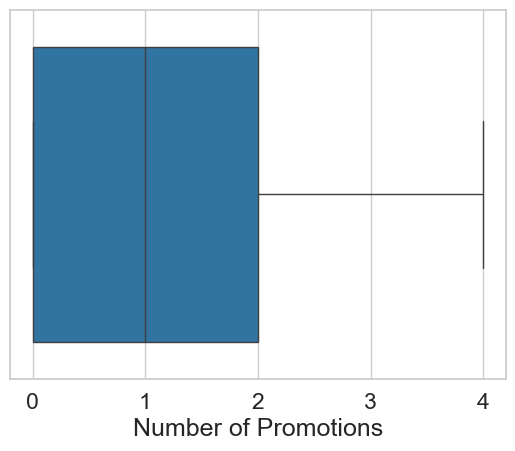

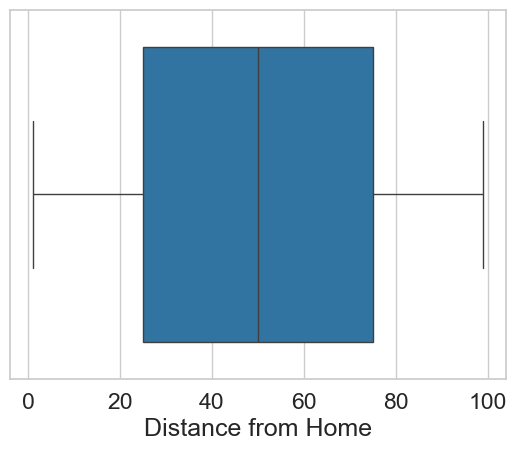

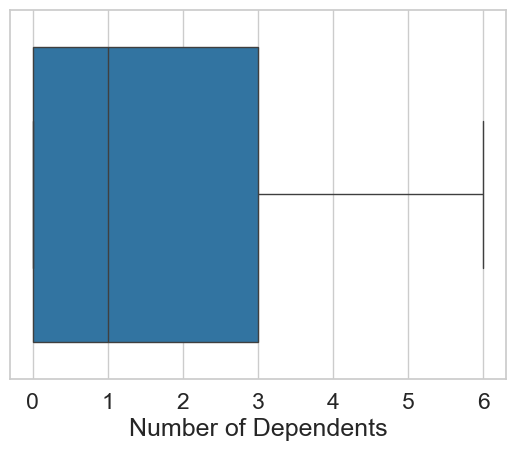

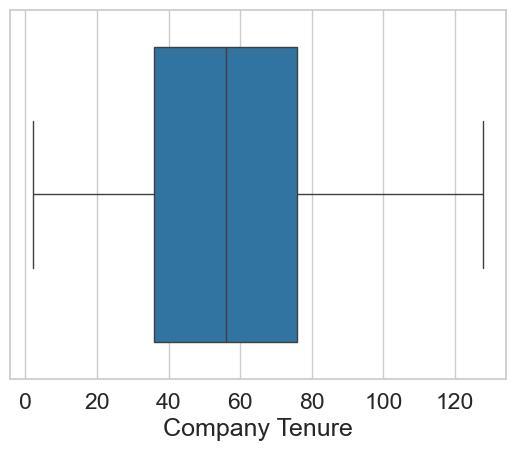

In [14]:
# outliers visualization
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
sns.color_palette("flare", as_cmap=True)
for col in numerical_columns:
    sns.boxplot(data=df, x=col)
    plt.show()

In [15]:
# outliers

for col in numerical_columns:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df = df[(df[col] > lower_bound) & (df[col] < upper_bound)]

In [16]:
df.shape

(59130, 24)

In [17]:
df.to_csv('D:/Programming/Projects/9- Employee Attrition Prediction/Milestone_1 (data collection and analysis)/Datasets/cleaned_train.csv', index=False)

In [18]:
'''
# feature creation

# 1- Salary_per_Performance:
perf_map = {
    'Low': 1,
    'Below Average': 2,
    'Average': 3,
    'High': 4
}
df['Performance Rating Num'] = df['Performance Rating'].map(perf_map)
df['Salary_per_Performance'] = df['Monthly Income'] / df['Performance Rating Num']

# 2- Tenure_Group
df['Tenure_Group'] = pd.cut(df['Years at Company'],
                            bins=[0, 1, 3, 5, 10, float('inf')],
                            labels=['<1 yr', '1-3 yrs', '3-5 yrs', '5-10 yrs', '10+ yrs'])

# 3- Distance_Overtime
df['Overtime_Binary'] = df['Overtime'].map({'Yes': 1, 'No': 0})
df['Distance_Overtime'] = df['Distance from Home'] * df['Overtime_Binary']

# 4- Performance_Satisfaction
satisfaction_map = {
    'Low': 1,
    'Medium': 2,
    'High': 3,
    'Very High': 4
}
df['Job Satisfaction Num'] = df['Job Satisfaction'].map(satisfaction_map)
df['Performance_Satisfaction'] = df['Performance Rating Num'] * df['Job Satisfaction Num']

# 5- Family_Load
df['Married'] = df['Marital Status'].map(lambda x: 1 if x == 'Married' else 0)
df['Family_Load'] = df['Number of Dependents'] + df['Married']

# 6- Experience_Level
df['Experience_Level'] = df['Company Tenure'] / df['Age']

# 7- Leadership_Score
rep_map = {'Poor': 1, 'Fair': 2, 'Good': 3, 'Excellent': 4}
recog_map = {'Low': 1, 'Medium': 2, 'High': 3, 'Very High': 4}
df['Company Reputation Num'] = df['Company Reputation'].map(rep_map)
df['Employee Recognition Num'] = df['Employee Recognition'].map(recog_map)
df['Leadership Opportunities Num'] = df['Leadership Opportunities'].map({'No': 0, 'Yes': 1})
df['Leadership_Score'] = df['Company Reputation Num'] + df['Employee Recognition Num'] + df['Leadership Opportunities Num']

# 8- Innovation_Score
df['Innovation Opportunities Num'] = df['Innovation Opportunities'].map({'No': 0, 'Yes': 1})
df['Innovation_Score'] = df['Innovation Opportunities Num'] + df['Job Satisfaction Num']

categorical_df = df.select_dtypes(include=['object', 'category'])
categorical_columns = []
for col in categorical_df:
    categorical_columns.append(col)
print(categorical_columns)

numerical_df = df.select_dtypes(include=['int64', 'float64'])
numerical_columns = numerical_df.columns.tolist()
print(numerical_columns)
'''


"\n# feature creation\n\n# 1- Salary_per_Performance:\nperf_map = {\n    'Low': 1,\n    'Below Average': 2,\n    'Average': 3,\n    'High': 4\n}\ndf['Performance Rating Num'] = df['Performance Rating'].map(perf_map)\ndf['Salary_per_Performance'] = df['Monthly Income'] / df['Performance Rating Num']\n\n# 2- Tenure_Group\ndf['Tenure_Group'] = pd.cut(df['Years at Company'],\n                            bins=[0, 1, 3, 5, 10, float('inf')],\n                            labels=['<1 yr', '1-3 yrs', '3-5 yrs', '5-10 yrs', '10+ yrs'])\n\n# 3- Distance_Overtime\ndf['Overtime_Binary'] = df['Overtime'].map({'Yes': 1, 'No': 0})\ndf['Distance_Overtime'] = df['Distance from Home'] * df['Overtime_Binary']\n\n# 4- Performance_Satisfaction\nsatisfaction_map = {\n    'Low': 1,\n    'Medium': 2,\n    'High': 3,\n    'Very High': 4\n}\ndf['Job Satisfaction Num'] = df['Job Satisfaction'].map(satisfaction_map)\ndf['Performance_Satisfaction'] = df['Performance Rating Num'] * df['Job Satisfaction Num']\n\n# 5-

In [19]:
attrition_col = df['Attrition']
df = df.drop('Attrition', axis=1)
df['Attrition'] = attrition_col
df.head()

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,Male,19,Education,5390,Excellent,Medium,Average,2,...,0,Mid,Medium,89,No,No,No,Excellent,Medium,Stayed
1,64756,59,Female,4,Media,5534,Poor,High,Low,3,...,3,Mid,Medium,21,No,No,No,Fair,Low,Stayed
2,30257,24,Female,10,Healthcare,8159,Good,High,Low,0,...,3,Mid,Medium,74,No,No,No,Poor,Low,Stayed
3,65791,36,Female,7,Education,3989,Good,High,High,1,...,2,Mid,Small,50,Yes,No,No,Good,Medium,Stayed
4,65026,56,Male,41,Education,4821,Fair,Very High,Average,0,...,0,Senior,Medium,68,No,No,No,Fair,Medium,Stayed


In [20]:
# Label Encoding
enc=LabelEncoder()

df_encoded = df.copy()
for col in categorical_columns:
    df_encoded[col] = enc.fit_transform(df[col])
df_encoded  

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,1,19,0,5390,0,2,0,2,...,0,1,1,89,0,0,0,0,2,1
1,64756,59,0,4,3,5534,3,0,3,3,...,3,1,1,21,0,0,0,1,1,1
2,30257,24,0,10,2,8159,2,0,3,0,...,3,1,1,74,0,0,0,3,1,1
3,65791,36,0,7,0,3989,2,0,2,1,...,2,1,2,50,1,0,0,2,2,1
4,65026,56,1,41,0,4821,1,3,0,0,...,0,2,1,68,0,0,0,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59593,37195,50,0,12,0,4414,1,0,0,1,...,2,2,2,35,0,0,1,3,3,0
59594,6266,18,1,4,2,8040,1,0,2,3,...,0,2,1,73,0,0,0,1,2,0
59595,54887,22,0,14,4,7944,1,0,2,0,...,2,0,2,29,0,1,0,2,2,1
59596,861,23,1,8,0,2931,1,3,0,0,...,0,0,0,9,0,0,0,2,1,0


In [21]:
df_encoded.to_csv('D:/Programming/Projects/9- Employee Attrition Prediction/Milestone_1 (data collection and analysis)/Datasets/encoded_train.csv', index=False)

In [22]:
# Label Encoding
enc=LabelEncoder()

test_encoded = df_test.copy()
for col in categorical_columns:
    test_encoded[col] = enc.fit_transform(df_test[col])
test_encoded

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,52685,36,1,13,2,8029,0,0,0,1,...,1,1,0,22,0,0,0,3,2,1
1,30585,35,1,7,0,4563,2,0,0,1,...,4,0,1,27,0,0,0,2,0,0
2,54656,50,1,7,0,5583,1,0,0,3,...,2,2,1,76,0,0,1,2,1,1
3,33442,58,1,44,3,5525,1,3,2,0,...,4,0,1,96,0,0,0,3,1,0
4,15667,39,1,24,0,4604,2,0,0,0,...,6,1,0,45,1,0,0,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14895,16243,56,0,42,2,7830,3,2,0,0,...,0,2,1,60,0,0,0,3,2,1
14896,47175,30,0,15,0,3856,2,2,0,2,...,0,0,1,20,0,0,0,2,2,0
14897,12409,52,1,5,0,5654,2,3,1,0,...,4,1,2,7,0,0,0,2,0,0
14898,9554,18,1,4,0,5276,1,0,0,0,...,3,1,0,5,0,0,0,3,0,1


In [23]:
test_encoded.to_csv('D:/Programming/Projects/9- Employee Attrition Prediction/Milestone_1 (data collection and analysis)/Datasets/encoded_test.csv', index=False)

# **Milestone 2: Advanced Data Analysis and Feature Engineering**

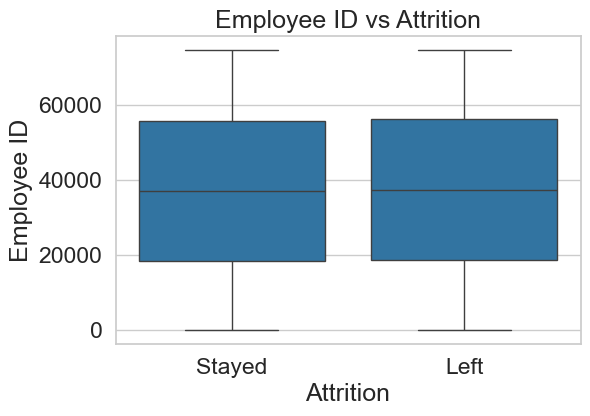

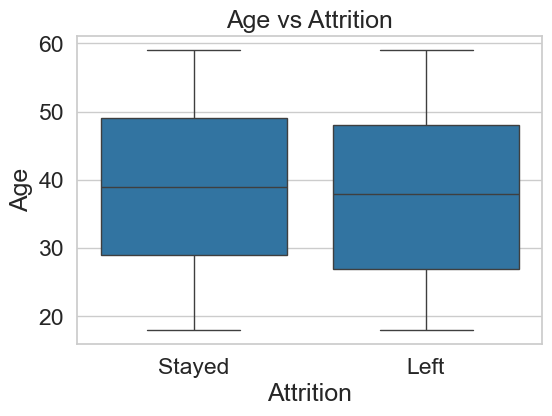

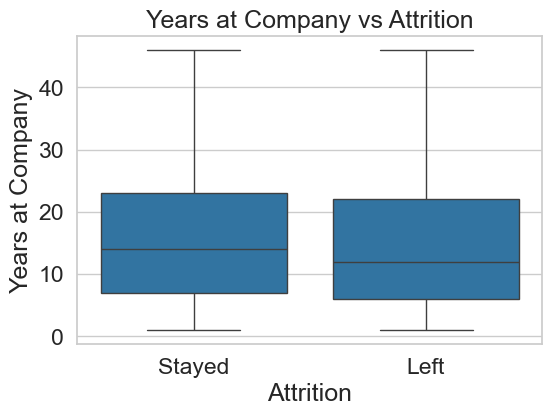

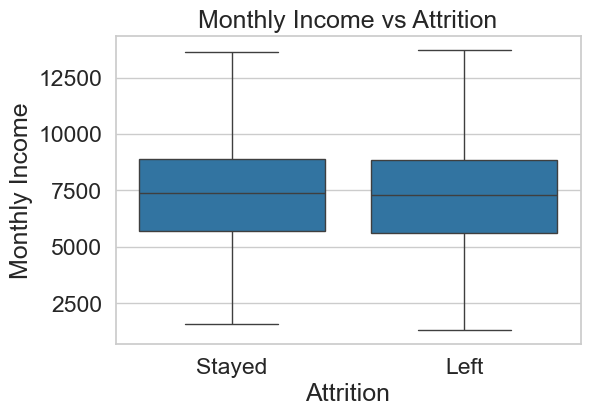

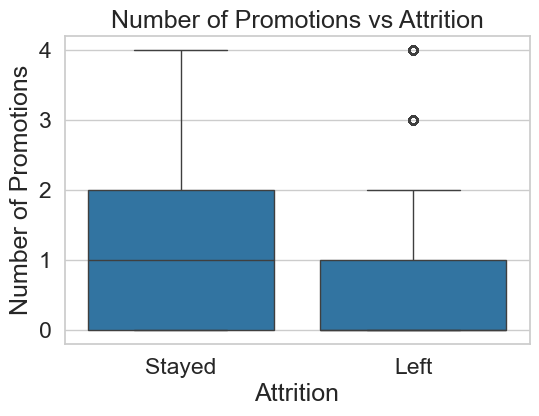

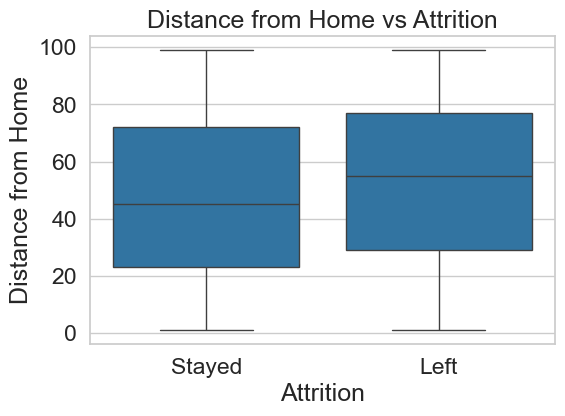

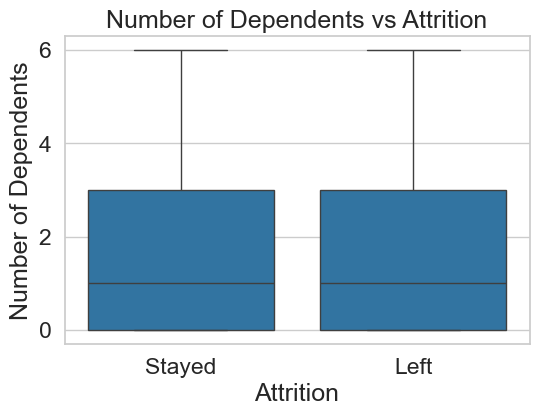

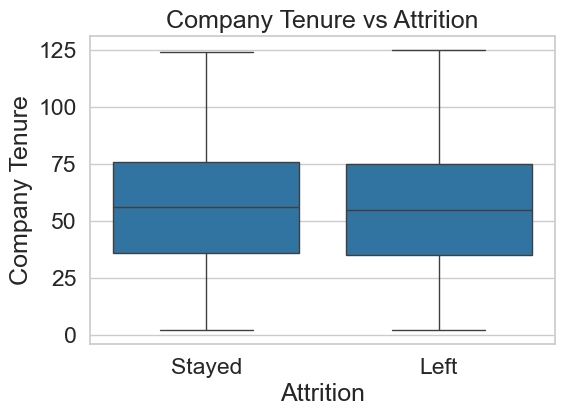

In [24]:
# numerical columns vs attrition
for col in numerical_columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(data=df, x='Attrition', y=col)
    plt.title(f'{col} vs Attrition')
    plt.show()

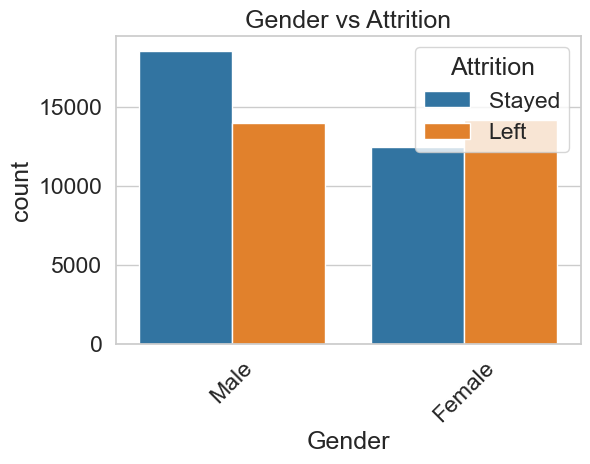

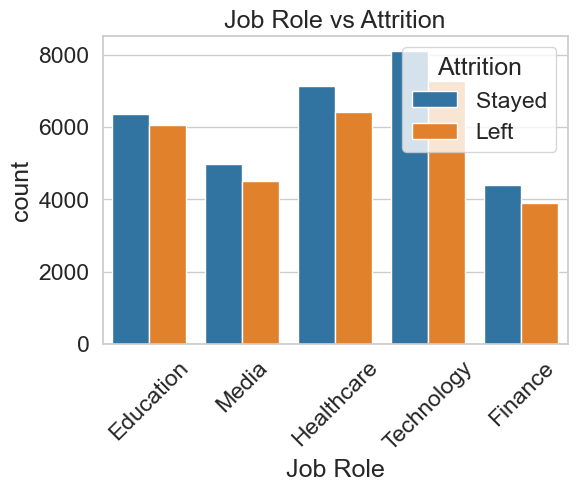

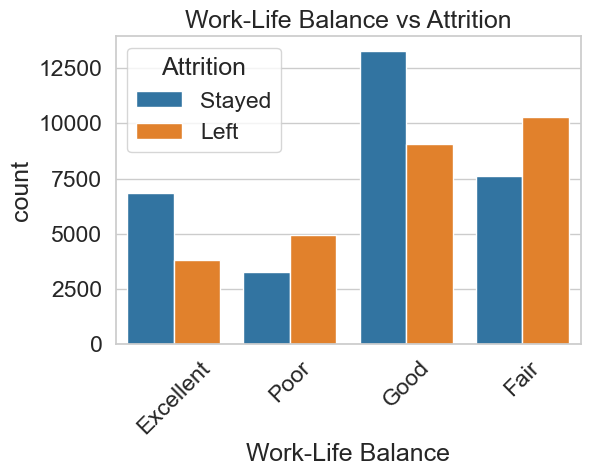

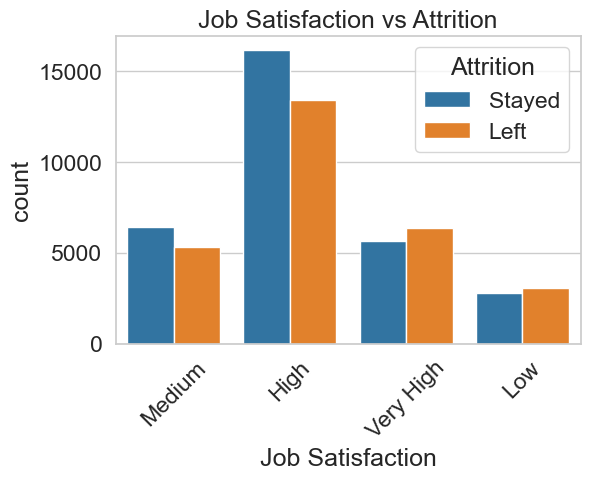

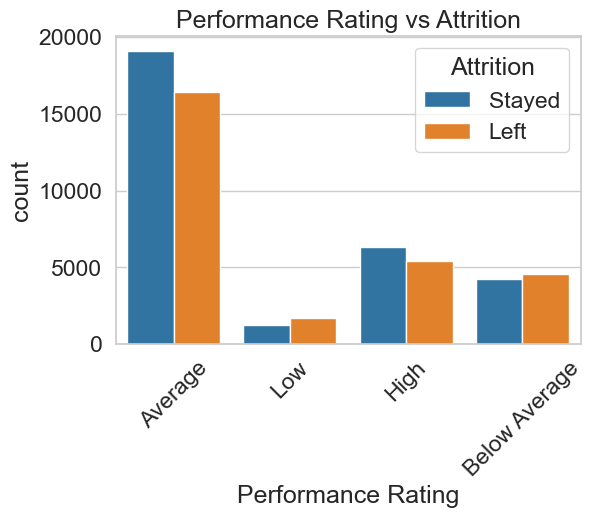

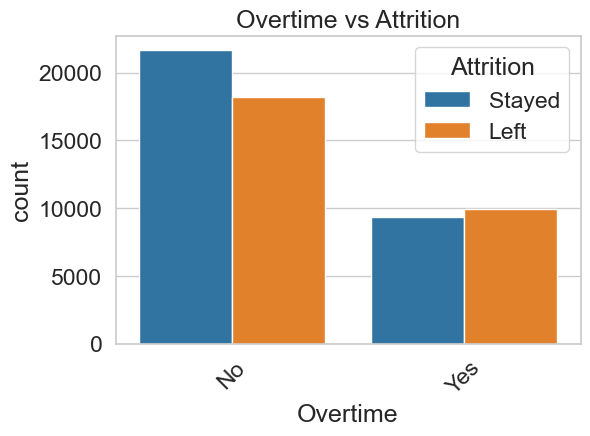

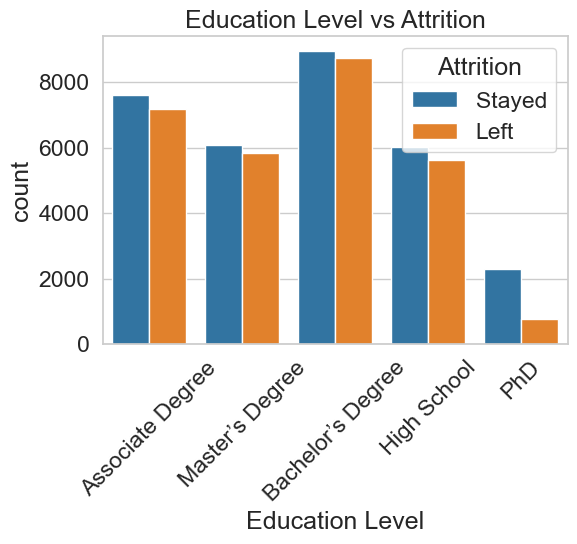

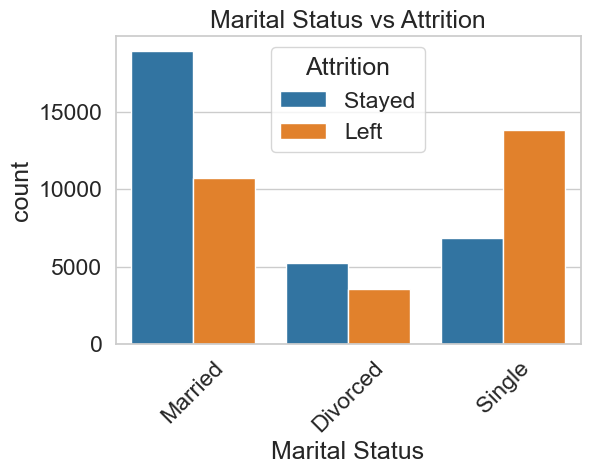

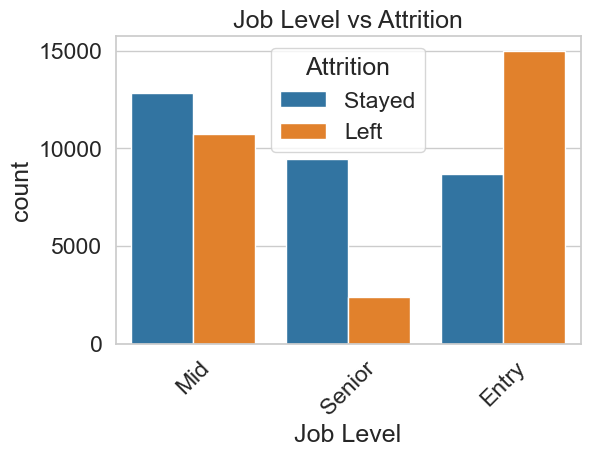

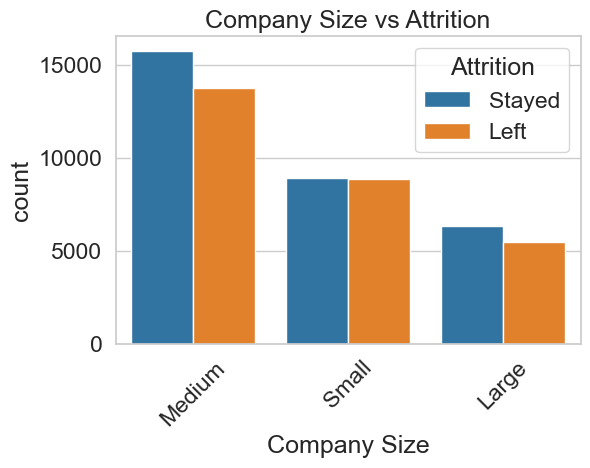

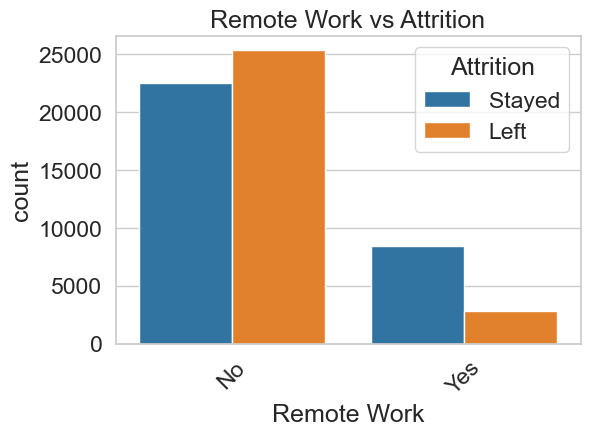

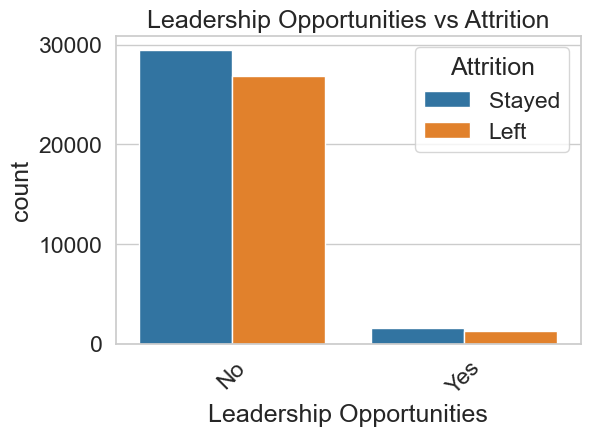

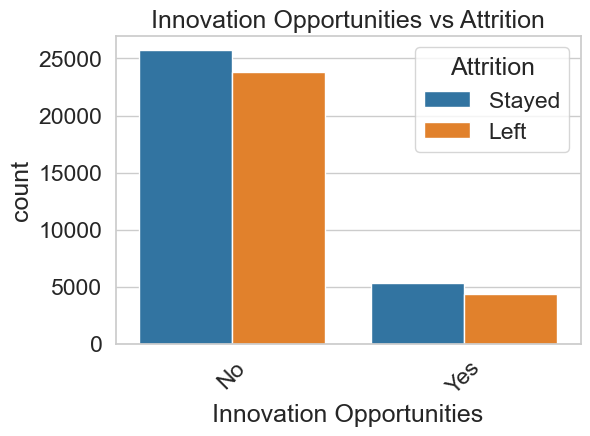

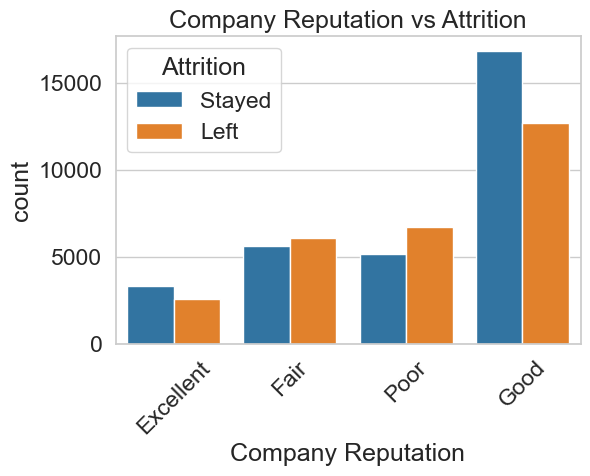

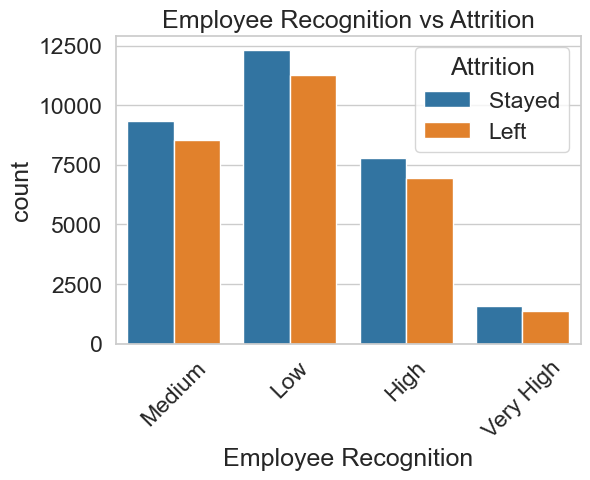

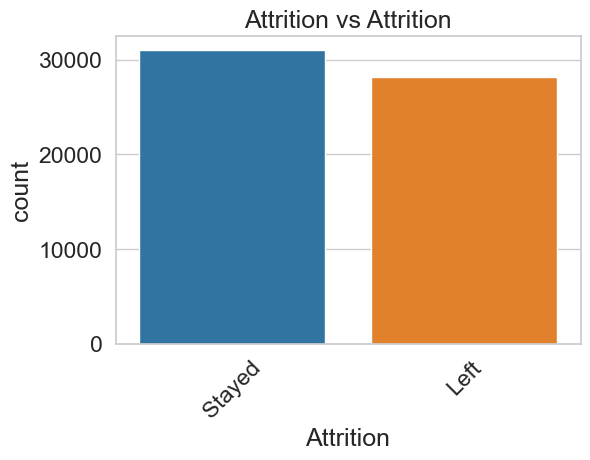

In [25]:
# categorical columns vs attrition
for col in categorical_columns:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x=col, hue='Attrition')
    plt.title(f'{col} vs Attrition')
    plt.xticks(rotation=45)
    plt.show()

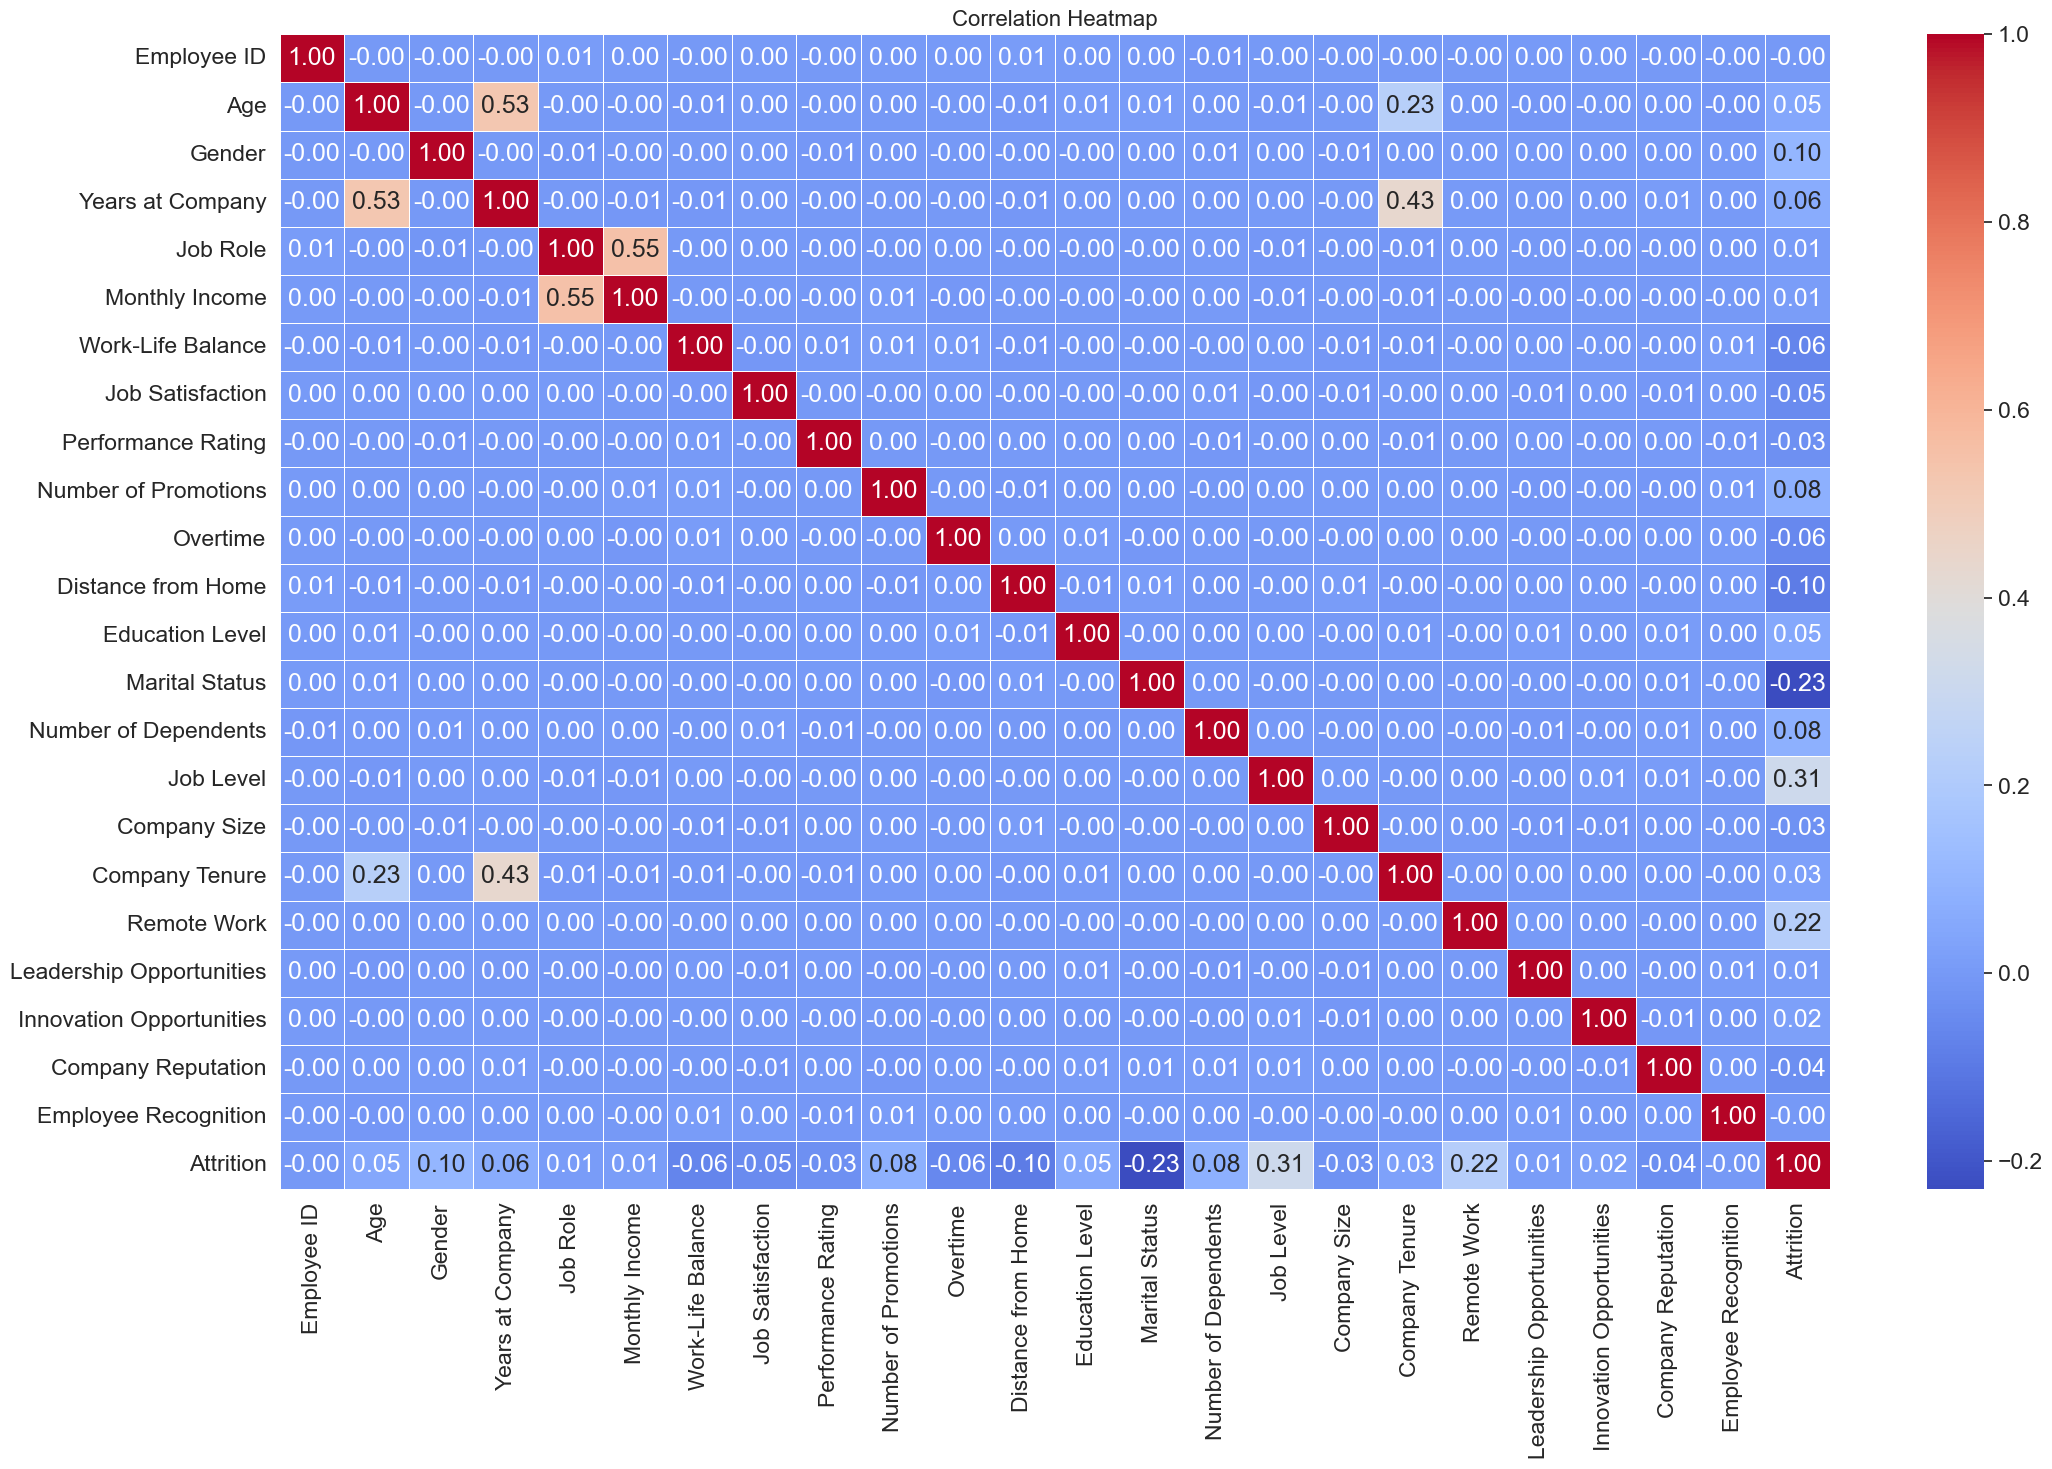

In [26]:
correlation_matrix = df_encoded.corr()

plt.figure(figsize=(25, 15))
sns.heatmap(correlation_matrix, 
            cmap='coolwarm',
            annot=True,            
            fmt=".2f",             
            linewidths=0.5)     
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

In [27]:
# Hypothesis Testing
results = {}

for col in categorical_columns:
    contingency_table = pd.crosstab(df[col], df["Attrition"])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    results[col] = p

for col, p_value in results.items():
    print(f"Chi-Square Test for {col} vs Attrition: p-value = {p_value:.4f}")

    if p_value < 0.05:
        print(f"🔴 Significant Relationship! {col} is likely related to Attrition.\n")
    else:
        print(f"🟢 No Significant Relationship. {col} is NOT strongly related to Attrition.\n")

Chi-Square Test for Gender vs Attrition: p-value = 0.0000
🔴 Significant Relationship! Gender is likely related to Attrition.

Chi-Square Test for Job Role vs Attrition: p-value = 0.0454
🔴 Significant Relationship! Job Role is likely related to Attrition.

Chi-Square Test for Work-Life Balance vs Attrition: p-value = 0.0000
🔴 Significant Relationship! Work-Life Balance is likely related to Attrition.

Chi-Square Test for Job Satisfaction vs Attrition: p-value = 0.0000
🔴 Significant Relationship! Job Satisfaction is likely related to Attrition.

Chi-Square Test for Performance Rating vs Attrition: p-value = 0.0000
🔴 Significant Relationship! Performance Rating is likely related to Attrition.

Chi-Square Test for Overtime vs Attrition: p-value = 0.0000
🔴 Significant Relationship! Overtime is likely related to Attrition.

Chi-Square Test for Education Level vs Attrition: p-value = 0.0000
🔴 Significant Relationship! Education Level is likely related to Attrition.

Chi-Square Test for Marita

In [28]:
# t-test
left = df[df['Attrition'] == 'Left']['Monthly Income']
stayed = df[df['Attrition'] == 'Stayed']['Monthly Income']

t_stat, p_val = ttest_ind(left, stayed, equal_var=False)
print(f"T-test result: t = {t_stat:.3f}, p = {p_val:.5f}")

T-test result: t = -2.818, p = 0.00483


In [29]:
# chi-square
contingency_table = pd.crosstab(df['Job Role'], df['Attrition'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-squared result: chi2 = {chi2:.2f}, p = {p:.5f}")

Chi-squared result: chi2 = 9.72, p = 0.04544


In [30]:
# ANOVA
anova = f_oneway(
    df[df['Attrition'] == 'Left']['Monthly Income'],
    df[df['Attrition'] == 'Stayed']['Monthly Income']
)
print(f"ANOVA result: F = {anova.statistic:.3f}, p = {anova.pvalue:.5f}")

ANOVA result: F = 7.951, p = 0.00481


In [31]:
# standardization
from sklearn.preprocessing import StandardScaler

Attrition = df_encoded["Attrition"]
df_encoded.drop("Attrition", axis=1, inplace=True)

scaler = StandardScaler()
standardized_data = scaler.fit_transform(df_encoded)
df_standardized = pd.DataFrame(standardized_data, columns=df_encoded.columns)
df_standardized["Attrition"] = Attrition
df_standardized.head()

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,-1.338913,-0.618567,0.905446,0.317386,-1.441161,-0.889652,-1.567620,0.730821,-0.732552,1.173424,...,-1.059178,0.266754,-0.143732,1.323304,-0.485368,-0.226728,-0.441073,-2.063261,0.993253,1.0
1,1.279181,1.711674,-1.104428,-1.052830,0.596927,-0.822450,1.616697,-0.902526,2.416850,2.178430,...,0.869258,0.266754,-0.143732,-1.365481,-0.485368,-0.226728,-0.441073,-0.918811,-0.179632,1.0
2,-0.323801,-1.201127,-1.104428,-0.504744,-0.082436,0.402600,0.555258,-0.902526,2.416850,-0.836587,...,0.869258,0.266754,-0.143732,0.730190,-0.485368,-0.226728,-0.441073,1.370088,-0.179632,1.0
3,1.327272,-0.202453,-1.104428,-0.778787,-1.441161,-1.543479,0.555258,-0.902526,1.367049,0.168419,...,0.226446,0.266754,1.283688,-0.218793,2.060294,-0.226728,-0.441073,0.225638,0.993253,1.0
4,1.291726,1.462005,0.905446,2.327036,-1.441161,-1.155196,-0.506181,1.547495,-0.732552,-0.836587,...,-1.059178,1.600975,-0.143732,0.492944,-0.485368,-0.226728,-0.441073,-0.918811,0.993253,1.0


In [ ]:
df_standardized.to_csv('D:/Programming/Projects/9- Employee Attrition Prediction/Milestone_1 (data collection and analysis)/Datasets/standardized_train.csv', index=False)

In [33]:
df

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,Male,19,Education,5390,Excellent,Medium,Average,2,...,0,Mid,Medium,89,No,No,No,Excellent,Medium,Stayed
1,64756,59,Female,4,Media,5534,Poor,High,Low,3,...,3,Mid,Medium,21,No,No,No,Fair,Low,Stayed
2,30257,24,Female,10,Healthcare,8159,Good,High,Low,0,...,3,Mid,Medium,74,No,No,No,Poor,Low,Stayed
3,65791,36,Female,7,Education,3989,Good,High,High,1,...,2,Mid,Small,50,Yes,No,No,Good,Medium,Stayed
4,65026,56,Male,41,Education,4821,Fair,Very High,Average,0,...,0,Senior,Medium,68,No,No,No,Fair,Medium,Stayed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59593,37195,50,Female,12,Education,4414,Fair,High,Average,1,...,2,Senior,Small,35,No,No,Yes,Poor,Very High,Left
59594,6266,18,Male,4,Healthcare,8040,Fair,High,High,3,...,0,Senior,Medium,73,No,No,No,Fair,Medium,Left
59595,54887,22,Female,14,Technology,7944,Fair,High,High,0,...,2,Entry,Small,29,No,Yes,No,Good,Medium,Stayed
59596,861,23,Male,8,Education,2931,Fair,Very High,Average,0,...,0,Entry,Large,9,No,No,No,Good,Low,Left


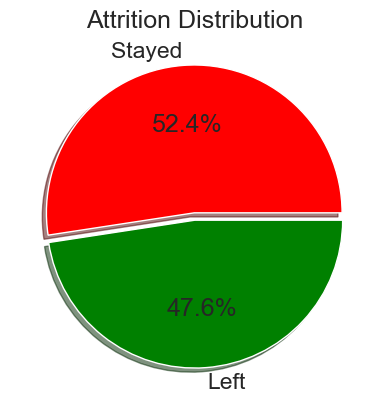

In [34]:

counts = df['Attrition'].value_counts()
colors = ['red', 'green']

plt.pie(counts, labels=counts.index, autopct='%1.1f%%',shadow=True,explode=[0.05,0],colors=colors)
plt.title('Attrition Distribution')
plt.show()

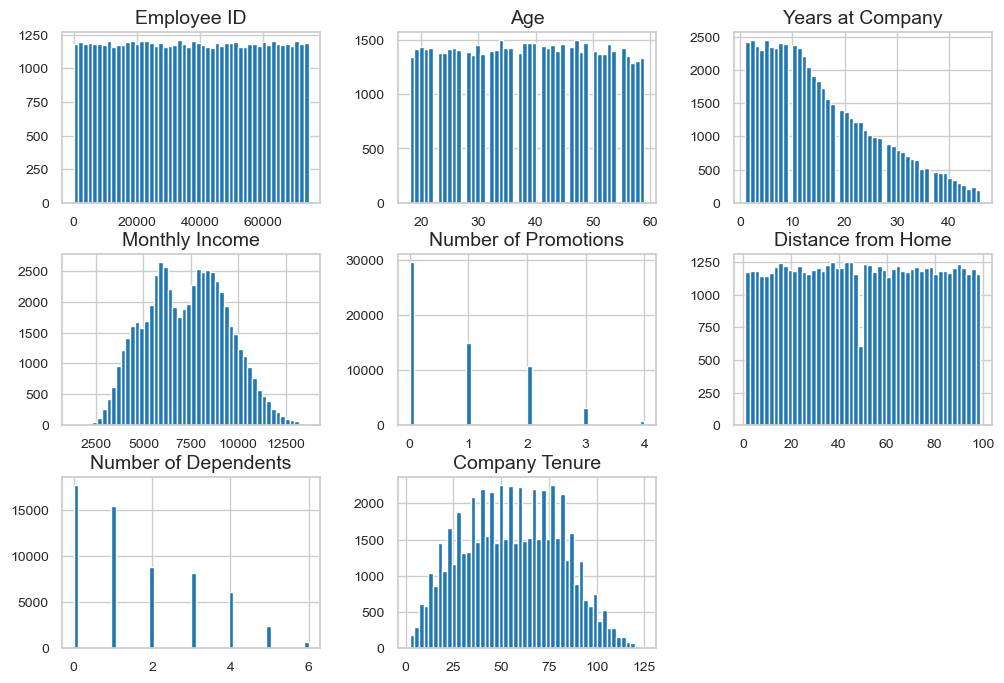

In [35]:
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

df.hist(bins=50, figsize=(12, 8))
plt.show()

# **Milestone 3: Machine Learning Model Development and Optimization**

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report ,roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

In [37]:
df_train = pd.read_csv('D:/Programming/Projects/9- Employee Attrition Prediction/Milestone_1 (data collection and analysis)/Datasets/encoded_train.csv')
df_test = pd.read_csv('D:/Programming/Projects/9- Employee Attrition Prediction/Milestone_1 (data collection and analysis)/Datasets/encoded_test.csv')

**XGBoost Model:**

c:\Users\eslam\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:51:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


validation Accuracy: 0.7514797902925757

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.73      0.74      5628
           1       0.76      0.77      0.76      6198

    accuracy                           0.75     11826
   macro avg       0.75      0.75      0.75     11826
weighted avg       0.75      0.75      0.75     11826


Confusion Matrix:
 [[4136 1492]
 [1447 4751]]


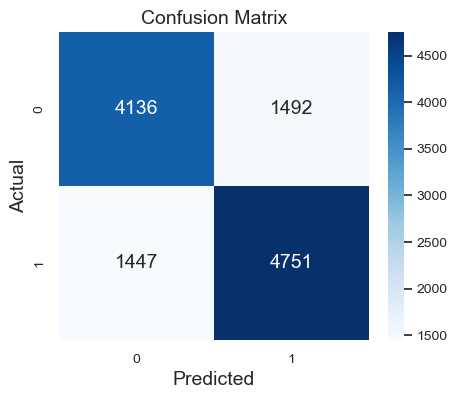

In [38]:
# Separate features and target
X = df_train.drop(columns=["Employee ID", "Attrition"])
y = df_train["Attrition"]
X_test_final = df_test.drop(columns=["Employee ID", "Attrition"])
y_test_final = df_test["Attrition"]

# Split training data for validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Evaluate on validation set
val_preds = xgb_model.predict(X_val)
val_accuracy = accuracy_score(y_val, val_preds)
val_report = classification_report(y_val, val_preds)
cm = confusion_matrix(y_val, val_preds)

print("validation Accuracy:", val_accuracy)
print("\nClassification Report:\n", val_report)
print("\nConfusion Matrix:\n", cm)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

test Accuracy: 0.7530872483221477

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.75      0.74      7032
           1       0.77      0.76      0.76      7868

    accuracy                           0.75     14900
   macro avg       0.75      0.75      0.75     14900
weighted avg       0.75      0.75      0.75     14900


Confusion Matrix:
 [[5245 1787]
 [1892 5976]]


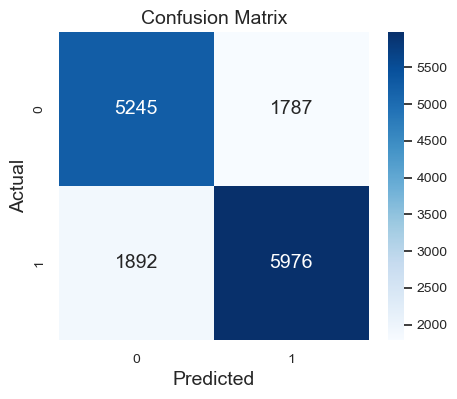

In [39]:
# Evaluate the model on the full test set
test_preds = xgb_model.predict(X_test_final)
test_accuracy = accuracy_score(y_test_final, test_preds)
test_report = classification_report(y_test_final, test_preds)
test_cm = confusion_matrix(y_test_final, test_preds)

print("test Accuracy:", test_accuracy)
print("\nClassification Report:\n", test_report)
print("\nConfusion Matrix:\n", test_cm)

plt.figure(figsize=(5, 4))
sns.heatmap(test_cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

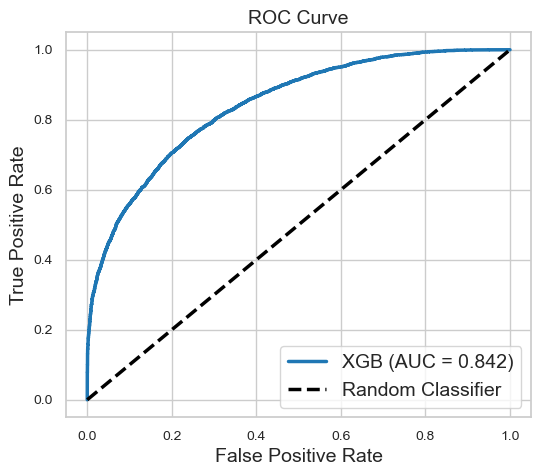

In [40]:
y_proba = xgb_model.predict_proba(X_test_final)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test_final, y_proba)
auc_score = roc_auc_score(y_test_final, y_proba)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f'XGB (AUC = {auc_score:.3f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

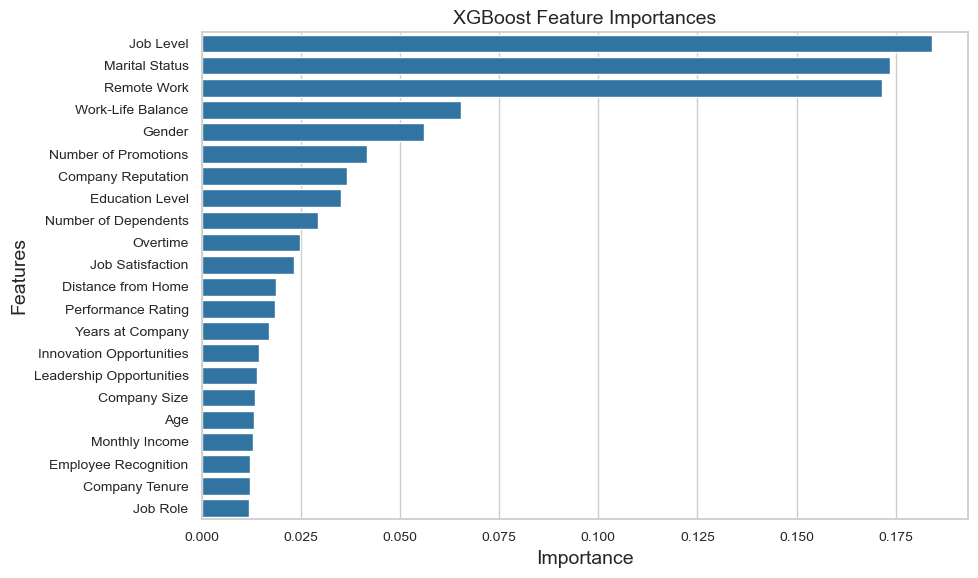

In [41]:
importances = xgb_model.feature_importances_
features = X_train.columns

importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
})

importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=importance_df["Importance"], y=importance_df["Feature"])
plt.title('XGBoost Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

In [42]:
importance_df.Feature

14                   Job Level
12              Marital Status
17                 Remote Work
5            Work-Life Balance
1                       Gender
8         Number of Promotions
20          Company Reputation
11             Education Level
13        Number of Dependents
9                     Overtime
6             Job Satisfaction
10          Distance from Home
7           Performance Rating
2             Years at Company
19    Innovation Opportunities
18    Leadership Opportunities
15                Company Size
0                          Age
4               Monthly Income
21        Employee Recognition
16              Company Tenure
3                     Job Role
Name: Feature, dtype: object

**Random Forest:**

Accuracy: 0.7449664429530202

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.73      0.73      7032
           1       0.76      0.75      0.76      7868

    accuracy                           0.74     14900
   macro avg       0.74      0.74      0.74     14900
weighted avg       0.75      0.74      0.75     14900


Confusion Matrix:
 [[5162 1870]
 [1930 5938]]


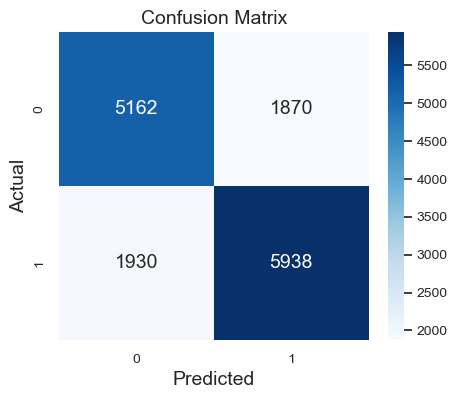

In [43]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test_final)
conf_matrix = confusion_matrix(y_test_final, y_pred)

print("Accuracy:", accuracy_score(y_test_final, y_pred))
print("\nClassification Report:\n", classification_report(y_test_final, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test_final, y_pred))

plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [44]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(rf_model, X, y, cv=kf)

print("Cross-validation scores:", scores)
print("Average score:", scores.mean())

Cross-validation scores: [0.73938779 0.74716726 0.74344664 0.74412312 0.74403856]
Average score: 0.7436326737696601


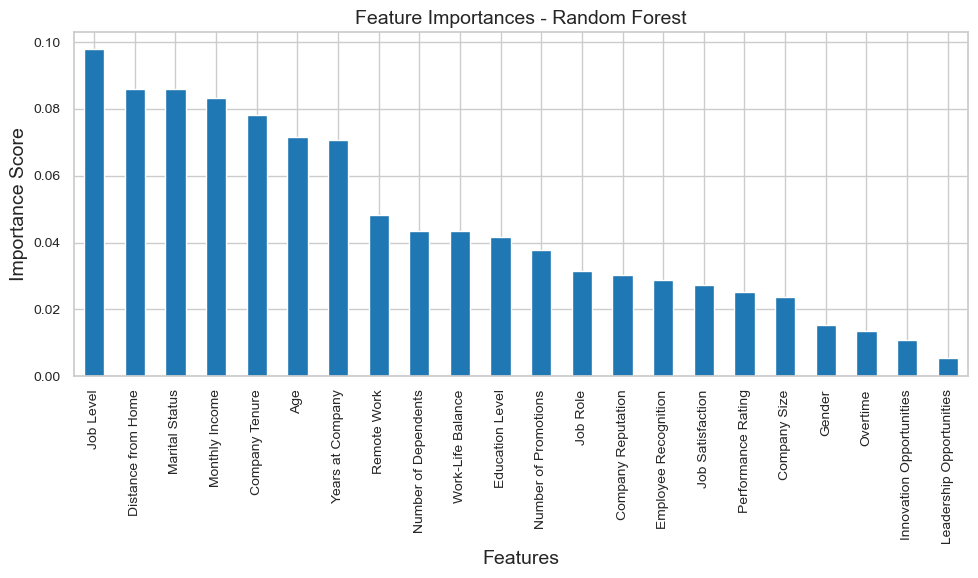

In [45]:
# Get importances
importance = pd.Series(rf_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 6))
importance.plot(kind='bar')
plt.title('Feature Importances - Random Forest')
plt.ylabel('Importance Score')
plt.xlabel('Features')
plt.tight_layout()
plt.show()